

```
# This is formatted as code
```

## Begin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# basic libraries and machine learning library scikit learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [ ]:
# import, file format

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_Project/Pond Dataset 2021.csv", encoding='iso-8859-1')

In [ ]:
df

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
0,4368.0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,ANDHRA PRADESH,24.0,27.0,3.2,6.5,7.0,8.0,245,5160,1.6,3.2,1.02,3.60,9,21,120,210
1,2353.0,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,ANDHRA PRADESH,26.0,29.0,3.0,6.8,6.9,7.8,599,1179,1.9,4.6,0.77,3.56,15,23,150,240
2,1790.0,"PULICATE LAKE , NELLORE DIST",LAKE,ANDHRA PRADESH,18.0,24.0,4.2,6.0,7.2,8.2,28000,56900,2.4,2.8,1.20,1.64,3,3,47,150
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180,476,1.0,2.5,0.34,2.30,24,365,170,549
4,4921.0,ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR,Wetland,ANDHRA PRADESH,21.0,30.0,5.4,6.5,7.3,8.0,496,734,1.0,2.3,0.35,1.00,43,289,240,727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,1765.0,"RABINDRASAROVAR NATIONAL LAKE,\nCALCUTTA, WEST...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
616,2544.0,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
617,2522.0,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13,29,1.0,1.1,0.30,0.30,70,110,110,210
618,2521.0,"WATER RESERVIOR AT DELO LAKE,\nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [ ]:
print(set(df["State Name"]))


{'UTTAR PRADESH', 'ODISHA', 'MEGHALAYA', 'GUJARAT', 'JAMMU & KASHMIR', 'PUDUCHERRY', 'HARYANA', 'LAKSHADWEEP', 'TAMIL NADU', 'TRIPURA', 'ANDHRA PRADESH', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'NAGALAND', 'PUNJAB', 'DELHI', 'MADHYA\nPRADESH', 'CHANDIGARH', 'MIZORAM', 'ASSAM', 'HIMACHAL\nPRADESH', 'MANIPUR', 'WEST BENGAL', 'MADHYA PRADESH', 'GOA', 'RAJASTHAN', 'UTTARAKHAND', 'TELANGANA', 'JAMMU &\nKASHMIR', 'BIHAR', 'CHHATTISGARH'}


In [ ]:
df.groupby('State Name')

In [ ]:
df.drop(columns=['Name of Monitoring Location'], inplace=True)

In [ ]:
df.drop(columns=['STN\nCode'], inplace=True)

## used Label encoder here

In [ ]:
Water_Body = df['Type Water Body'].values
State = df['State Name'].values

In [ ]:
encoder = LabelEncoder()
df['Type Water Body']= encoder.fit_transform(Water_Body)
df['State Name'] =  encoder.fit_transform(State)

In [ ]:
df

,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
0,0,0,24.0,27.0,3.2,6.5,7.0,8.0,245,5160,1.6,3.2,1.02,3.60,9,21,120,210
1,0,0,26.0,29.0,3.0,6.8,6.9,7.8,599,1179,1.9,4.6,0.77,3.56,15,23,150,240
2,0,0,18.0,24.0,4.2,6.0,7.2,8.2,28000,56900,2.4,2.8,1.20,1.64,3,3,47,150
3,2,0,22.0,29.0,5.4,6.2,6.3,7.9,180,476,1.0,2.5,0.34,2.30,24,365,170,549
4,3,0,21.0,30.0,5.4,6.5,7.3,8.0,496,734,1.0,2.3,0.35,1.00,43,289,240,727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0,31,22.0,31.0,5.2,9.7,7.2,8.5,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
616,0,31,22.0,32.0,8.8,9.8,7.0,7.6,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
617,0,31,7.0,16.0,7.1,8.1,6.9,7.6,13,29,1.0,1.1,0.30,0.30,70,110,110,210
618,0,31,9.0,24.0,7.2,8.2,6.9,7.6,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Type Water Body                    620 non-null    int64  
 1   State Name                         620 non-null    int64  
 2   Temperature
?C (Min)               617 non-null    float64
 3   Temperature
?C (Max)               617 non-null    float64
 4   Dissolved Oxygen (mg/L) (Min)      620 non-null    object 
 5   Dissolved Oxygen (mg/L) (Max)      620 non-null    object 
 6   pH (Min)                           620 non-null    object 
 7   pH (Max)                           620 non-null    float64
 8   Conductivity (?mhos/cm) (Min)      618 non-null    object 
 9   Conductivity (?mhos/cm) (Max)      618 non-null    object 
 10  BOD (mg/L) (Min)                   620 non-null    object 
 11  BOD (mg/L) (Max)                   620 non-null    object 

In [ ]:
df.nunique()

Type Water Body                        4
State Name                            32
Temperature\n?C (Min)                 59
Temperature\n?C (Max)                 53
Dissolved Oxygen (mg/L) (Min)         79
Dissolved Oxygen (mg/L) (Max)        107
pH (Min)                              31
pH (Max)                              30
Conductivity (?mhos/cm) (Min)        443
Conductivity (?mhos/cm) (Max)        509
BOD (mg/L) (Min)                      63
BOD (mg/L) (Max)                     135
Nitrate N + Nitrite N(mg/L) (Min)    147
Nitrate N + Nitrite N(mg/L) (Max)    287
Fecal Coliform (MPN/100ml) (Min)     115
Fecal Coliform (MPN/100ml) (Max)     186
Total Coliform (MPN/100ml) (Min)     137
Total Coliform (MPN/100ml) (Max)     149
dtype: int64

In [ ]:
df.dtypes

Type Water Body                        int64
State Name                             int64
Temperature\n?C (Min)                float64
Temperature\n?C (Max)                float64
Dissolved Oxygen (mg/L) (Min)         object
Dissolved Oxygen (mg/L) (Max)         object
pH (Min)                              object
pH (Max)                             float64
Conductivity (?mhos/cm) (Min)         object
Conductivity (?mhos/cm) (Max)         object
BOD (mg/L) (Min)                      object
BOD (mg/L) (Max)                      object
Nitrate N + Nitrite N(mg/L) (Min)     object
Nitrate N + Nitrite N(mg/L) (Max)     object
Fecal Coliform (MPN/100ml) (Min)      object
Fecal Coliform (MPN/100ml) (Max)      object
Total Coliform (MPN/100ml) (Min)      object
Total Coliform (MPN/100ml) (Max)      object
dtype: object

In [ ]:
df.to_csv("0.csv")

## For all the blank spaces fill them with mean of that column

In [ ]:
df.replace("-", np.nan, inplace=True)

In [ ]:
df.to_csv("1.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Type Water Body                    620 non-null    int64  
 1   State Name                         620 non-null    int64  
 2   Temperature
?C (Min)               617 non-null    float64
 3   Temperature
?C (Max)               617 non-null    float64
 4   Dissolved Oxygen (mg/L) (Min)      618 non-null    object 
 5   Dissolved Oxygen (mg/L) (Max)      618 non-null    object 
 6   pH (Min)                           620 non-null    object 
 7   pH (Max)                           620 non-null    float64
 8   Conductivity (?mhos/cm) (Min)      615 non-null    object 
 9   Conductivity (?mhos/cm) (Max)      615 non-null    object 
 10  BOD (mg/L) (Min)                   618 non-null    object 
 11  BOD (mg/L) (Max)                   618 non-null    object 

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            # Convert to numeric if possible
            df[col] = pd.to_numeric(df[col], errors='coerce')

            # Fill missing values with the mode
            mode_value = df[col].mode().iloc[0]
            df[col].fillna(mode_value, inplace=True)
        except Exception as e:
            print(f"Error handling column {col}: {e}")

# If you want to handle numeric columns as well:
df.fillna(df.mean(), inplace=True)


In [ ]:
for i in df.columns:
  if df[i].dtype=='object':
    try:
      df[i].fillna(df[i].mode(), inplace=True)
    except:
      print(i, "Not Done")

In [ ]:
for i in df.columns:
    if df[i].dtype=='object':
        print(df[i])
        x=0
        try:
            print(x)
            df[i].fillna(df[i].mode(), inplace=True)
            x+=1
        except:
            print(i, "Not Done")
            x+=1

In [ ]:
df.to_csv("2.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Type Water Body                    620 non-null    int64  
 1   State Name                         620 non-null    int64  
 2   Temperature
?C (Min)               620 non-null    float64
 3   Temperature
?C (Max)               620 non-null    float64
 4   Dissolved Oxygen (mg/L) (Min)      620 non-null    float64
 5   Dissolved Oxygen (mg/L) (Max)      620 non-null    float64
 6   pH (Min)                           620 non-null    float64
 7   pH (Max)                           620 non-null    float64
 8   Conductivity (?mhos/cm) (Min)      620 non-null    float64
 9   Conductivity (?mhos/cm) (Max)      620 non-null    float64
 10  BOD (mg/L) (Min)                   620 non-null    float64
 11  BOD (mg/L) (Max)                   620 non-null    float64

In [ ]:
# no one is object type now

In [ ]:
df[df.isna().any(axis=1)]

,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)


#### now no values are `NaN`, so we are good to go for model implementation

## Final Graphs:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# LSTM
# BILSTM

In [ ]:
df.corr()

,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
Type Water Body,1.000000,-0.203781,0.191081,-0.074185,0.057823,0.009569,-0.027018,-0.069424,0.085016,0.137627,-0.027450,0.029079,0.085851,-0.012219,0.003708,-0.048892,-0.029232,-0.037417
State Name,-0.203781,1.000000,0.018169,0.050481,-0.137518,-0.343606,0.056983,0.106491,-0.057353,-0.104230,-0.021093,-0.036222,0.334484,0.212607,-0.089325,-0.025077,-0.054553,-0.022723
Temperature\n?C (Min),0.191081,0.018169,1.000000,0.200801,-0.326656,-0.262334,-0.134841,0.079681,0.090154,0.081248,0.228588,0.204605,0.094020,0.109300,0.183479,0.049225,0.089061,0.044436
Temperature\n?C (Max),-0.074185,0.050481,0.200801,1.000000,-0.067188,-0.008248,0.106520,0.227596,-0.019851,0.066840,0.033069,-0.145886,-0.015061,0.024228,-0.159246,-0.060619,0.031308,-0.057883
Dissolved Oxygen (mg/L) (Min),0.057823,-0.137518,-0.326656,-0.067188,1.000000,0.544015,0.153305,-0.077471,-0.057574,-0.036238,-0.367128,-0.416501,-0.209874,-0.282295,-0.155917,-0.107223,-0.066294,-0.094095
Dissolved Oxygen (mg/L) (Max),0.009569,-0.343606,-0.262334,-0.008248,0.544015,1.000000,0.073944,0.119009,-0.114870,0.011067,-0.224471,-0.139762,-0.329912,-0.237161,-0.018558,-0.058619,-0.078733,-0.070426
pH (Min),-0.027018,0.056983,-0.134841,0.106520,0.153305,0.073944,1.000000,0.495685,0.037599,-0.013797,0.116948,-0.165761,-0.025548,-0.038977,-0.104378,-0.086923,0.042028,-0.072659
pH (Max),-0.069424,0.106491,0.079681,0.227596,-0.077471,0.119009,0.495685,1.000000,0.039460,0.090239,0.034745,-0.075134,-0.098127,0.041053,-0.013623,-0.092993,0.002174,-0.111075
Conductivity (?mhos/cm) (Min),0.085016,-0.057353,0.090154,-0.019851,-0.057574,-0.114870,0.037599,0.039460,1.000000,0.584005,0.112564,0.051589,0.123924,0.043903,0.060027,0.009387,0.122946,0.008781
Conductivity (?mhos/cm) (Max),0.137627,-0.104230,0.081248,0.066840,-0.036238,0.011067,-0.013797,0.090239,0.584005,1.000000,0.008738,0.044621,0.053111,0.009871,-0.007115,-0.005284,0.026492,-0.006043


<Axes: >

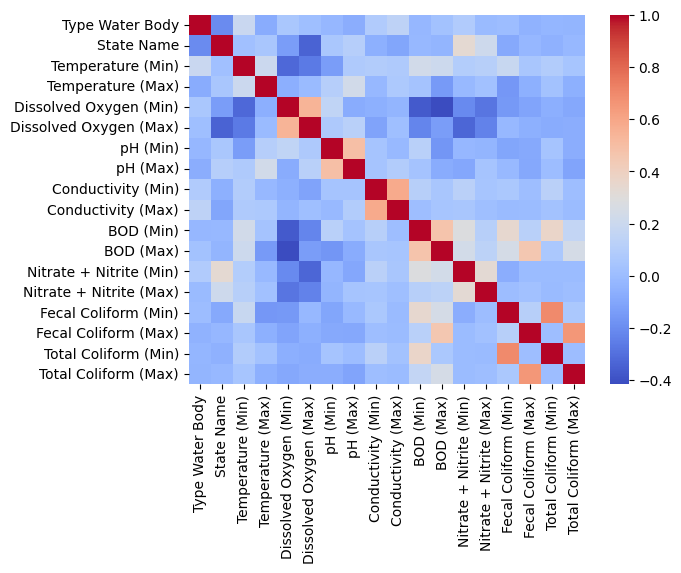

In [ ]:
df_tmp = df[::-1][::-1]
df_tmp.rename(columns={
                        'Type Water Body' : 'Type Water Body',
                        'State Name' : 'State Name',
                        'Temperature\n?C (Min)' : 'Temperature (Min)',
                        'Temperature\n?C (Max)' : 'Temperature (Max)',
                        'Dissolved Oxygen (mg/L) (Min)' : 'Dissolved Oxygen (Min)',
                        'Dissolved Oxygen (mg/L) (Max)' : 'Dissolved Oxygen (Max)',
                        'pH (Min)' : 'pH (Min)',
                        'pH (Max)' : 'pH (Max)',
                        'Conductivity (?mhos/cm) (Min)' : 'Conductivity (Min)',
                        'Conductivity (?mhos/cm) (Max)' : 'Conductivity (Max)',
                        'BOD (mg/L) (Min)' : 'BOD (Min)',
                        'BOD (mg/L) (Max)' : 'BOD (Max)',
                        'Nitrate N + Nitrite N(mg/L) (Min)' : 'Nitrate + Nitrite (Min)',
                        'Nitrate N + Nitrite N(mg/L) (Max)' : 'Nitrate + Nitrite (Max)',
                        'Fecal Coliform (MPN/100ml) (Min)' : 'Fecal Coliform (Min)',
                        'Fecal Coliform (MPN/100ml) (Max)' : 'Fecal Coliform (Max)',
                        'Total Coliform (MPN/100ml) (Min)' : 'Total Coliform (Min)',
                        'Total Coliform (MPN/100ml) (Max)' : 'Total Coliform (Max)',
                        },
                       inplace=True)
sns.heatmap(df_tmp.corr(), cmap='coolwarm')


In [ ]:
df.columns

Index(['Type Water Body', 'State Name', 'Temperature\n?C (Min)',
       'Temperature\n?C (Max)', 'Dissolved Oxygen (mg/L) (Min)',
       'Dissolved Oxygen (mg/L) (Max)', 'pH (Min)', 'pH (Max)',
       'Conductivity (?mhos/cm) (Min)', 'Conductivity (?mhos/cm) (Max)',
       'BOD (mg/L) (Min)', 'BOD (mg/L) (Max)',
       'Nitrate N + Nitrite N(mg/L) (Min)',
       'Nitrate N + Nitrite N(mg/L) (Max)', 'Fecal Coliform (MPN/100ml) (Min)',
       'Fecal Coliform (MPN/100ml) (Max)', 'Total Coliform (MPN/100ml) (Min)',
       'Total Coliform (MPN/100ml) (Max)'],
      dtype='object')

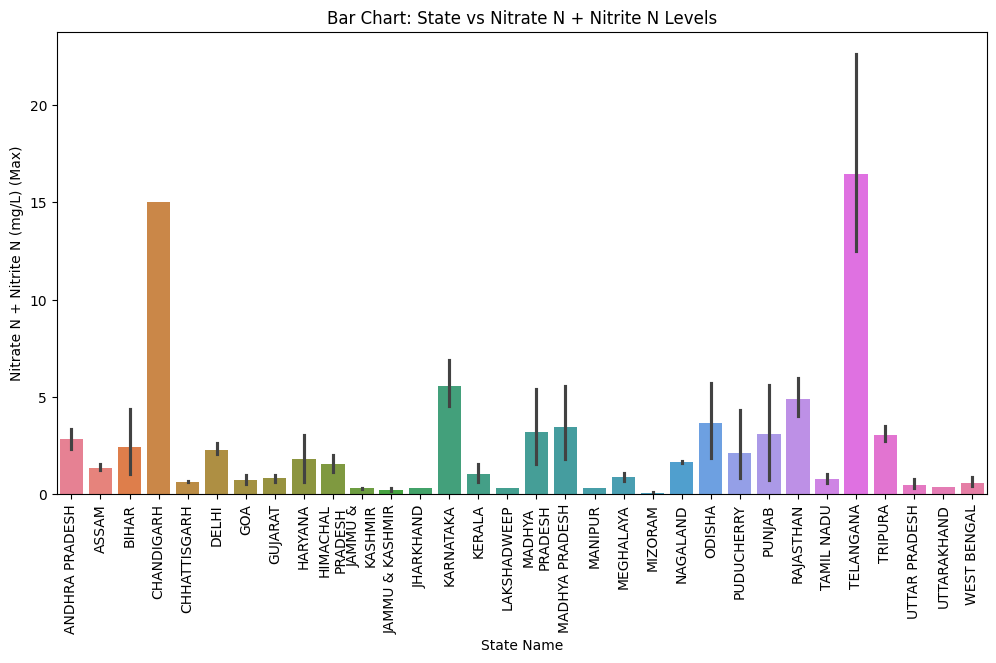

In [ ]:
# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=State, y='Nitrate N + Nitrite N(mg/L) (Max)', data=df, hue=State, legend=False)
plt.title('Bar Chart: State vs Nitrate N + Nitrite N Levels')
plt.xlabel('State Name')
plt.ylabel('Nitrate N + Nitrite N (mg/L) (Max)')
plt.xticks(rotation=90)
plt.show()


# Proceed:

In [ ]:
df

,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
0,0,0,24.0,27.0,3.2,6.5,7.0,8.0,245.0,5160.0,1.6,3.2,1.02,3.60,9.0,21.0,120.0,210.0
1,0,0,26.0,29.0,3.0,6.8,6.9,7.8,599.0,1179.0,1.9,4.6,0.77,3.56,15.0,23.0,150.0,240.0
2,0,0,18.0,24.0,4.2,6.0,7.2,8.2,28000.0,56900.0,2.4,2.8,1.20,1.64,3.0,3.0,47.0,150.0
3,2,0,22.0,29.0,5.4,6.2,6.3,7.9,180.0,476.0,1.0,2.5,0.34,2.30,24.0,365.0,170.0,549.0
4,3,0,21.0,30.0,5.4,6.5,7.3,8.0,496.0,734.0,1.0,2.3,0.35,1.00,43.0,289.0,240.0,727.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0,31,22.0,31.0,5.2,9.7,7.2,8.5,252.0,826.0,1.8,4.1,0.30,1.90,330.0,790.0,1100.0,1700.0
616,0,31,22.0,32.0,8.8,9.8,7.0,7.6,311.0,422.0,2.7,7.3,0.30,0.80,3100.0,9400.0,4300.0,12000.0
617,0,31,7.0,16.0,7.1,8.1,6.9,7.6,13.0,29.0,1.0,1.1,0.30,0.30,70.0,110.0,110.0,210.0
618,0,31,9.0,24.0,7.2,8.2,6.9,7.6,20.0,36.0,1.0,1.8,0.30,0.30,60.0,130.0,110.0,330.0


In [ ]:
df['pH (Avg)'] = (df['pH (Max)']+df['pH (Min)'])/2

In [ ]:
df["pH (Min)"].values

array([7. , 6.9, 7.2, 6.3, 7.3, 7.1, 7.1, 7.1, 7.1, 6.6, 7.3, 6.8, 7.1,
       7. , 7.2, 6.8, 6.9, 7.1, 6.6, 6.8, 7.2, 7. , 7. , 7. , 7.1, 7.7,
       7. , 7.3, 7. , 7.2, 7.2, 7. , 7. , 6.8, 7.2, 7. , 7.2, 7. , 7. ,
       7.1, 6.8, 7. , 7.2, 7. , 7.2, 6.8, 6.9, 7.2, 7.2, 7.1, 7. , 7.3,
       7. , 6.4, 7.4, 6.7, 7.2, 7. , 7.2, 6. , 7.2, 6.8, 7. , 7.3, 6.8,
       7. , 6.6, 7.3, 6.8, 6.3, 6.8, 7.2, 7.6, 7.1, 7.4, 6.9, 7.1, 7.1,
       7.6, 8.7, 8.1, 5.7, 6.3, 6. , 6.2, 6.2, 6.4, 6.1, 6.5, 6.7, 7.6,
       7.6, 7.3, 7.3, 7.7, 7.4, 7.2, 8.5, 7.3, 6.8, 7.3, 8.3, 8.3, 7.5,
       7.8, 7.2, 7.6, 7.3, 7.5, 7.3, 7.1, 7.2, 7.6, 7. , 7. , 7.2, 6.1,
       7.1, 7.3, 6.9, 7.4, 7.9, 7.3, 7.2, 7.2, 7.3, 7.1, 7.3, 7.1, 7.1,
       7.2, 7. , 7.1, 7.5, 7.5, 7.4, 7.5, 7.7, 7.9, 7.4, 7.4, 7.6, 7.5,
       8.1, 7.3, 7.1, 7.2, 7.1, 7.1, 7.1, 7.2, 7.5, 7.6, 7.3, 7.3, 7.6,
       6.5, 6.5, 6.6, 6.3, 6.8, 6.5, 7.1, 6.5, 7.6, 6.5, 6.5, 6.5, 6.5,
       6.5, 7.1, 6.5, 6.1, 6.3, 6. , 6.5, 6.4, 6.1, 6.5, 6.5, 7.

In [ ]:
df["pH (Max)"].values

array([ 8. ,  7.8,  8.2,  7.9,  8. ,  9. ,  7.9,  8.5,  8.6,  8.1,  7.9,
        8.1,  8. ,  7.9,  8.3,  8.2,  8.6,  8.1,  7.7,  7.9,  7.9,  8.2,
        8. ,  8.4,  8. ,  7.8,  7.7,  7.8,  7.8,  7.8,  7.8,  7.6,  7.6,
        7.6,  7.8,  7.7,  8. ,  7.6,  7.5,  7.6,  7.5,  8. ,  7.5,  7.6,
        7.8,  8. ,  7.7,  7.6,  7.7,  7.7,  7.6,  7.8,  7.8,  7.6,  7.8,
        7.4,  8. ,  8. ,  8. ,  7.9,  7.8,  7.7,  7.7,  7.9,  7.8,  7.6,
        7.6,  7.8,  7.7,  7.6,  7.5,  8.3,  9. ,  8.2,  8.8,  8.7,  7.8,
        7.8,  8.1,  9.1,  8.3,  7.4,  8.3,  7.7,  7.4,  7.3,  7.7,  7.8,
        7.8,  8.5,  8.5,  8.3,  8. ,  8.4,  8.5,  8.5,  8.4,  9.1,  8.4,
        8.4,  8.6,  9.1,  9. ,  8.3,  8.8,  8.3,  8.5,  8.5,  8.4,  8.4,
        8.5,  8. ,  8.2,  7.9,  7.8,  8. ,  7.7,  8.2,  8.5,  8.3,  7.9,
        8.6,  7.7,  7.4,  7.4,  7.8,  7.4,  8.1,  7.7,  7.7,  7.9,  8.3,
        7.9,  8.2,  8.1,  8.5,  8.3,  8.5,  8.2,  8.5,  7.8,  8.3,  8.1,
        8.6,  7.6,  7.5,  7.9,  7.6,  8. ,  7.7,  7

In [ ]:
df.drop(columns='pH (Min)', inplace=True)
df.drop(columns='pH (Max)', inplace=True)

In [ ]:
df

,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max),pH (Avg)
0,0,0,24.0,27.0,3.2,6.5,245.0,5160.0,1.6,3.2,1.02,3.60,9.0,21.0,120.0,210.0,7.50
1,0,0,26.0,29.0,3.0,6.8,599.0,1179.0,1.9,4.6,0.77,3.56,15.0,23.0,150.0,240.0,7.35
2,0,0,18.0,24.0,4.2,6.0,28000.0,56900.0,2.4,2.8,1.20,1.64,3.0,3.0,47.0,150.0,7.70
3,2,0,22.0,29.0,5.4,6.2,180.0,476.0,1.0,2.5,0.34,2.30,24.0,365.0,170.0,549.0,7.10
4,3,0,21.0,30.0,5.4,6.5,496.0,734.0,1.0,2.3,0.35,1.00,43.0,289.0,240.0,727.0,7.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0,31,22.0,31.0,5.2,9.7,252.0,826.0,1.8,4.1,0.30,1.90,330.0,790.0,1100.0,1700.0,7.85
616,0,31,22.0,32.0,8.8,9.8,311.0,422.0,2.7,7.3,0.30,0.80,3100.0,9400.0,4300.0,12000.0,7.30
617,0,31,7.0,16.0,7.1,8.1,13.0,29.0,1.0,1.1,0.30,0.30,70.0,110.0,110.0,210.0,7.25
618,0,31,9.0,24.0,7.2,8.2,20.0,36.0,1.0,1.8,0.30,0.30,60.0,130.0,110.0,330.0,7.25


### Train test split:

In [ ]:
import pandas as pd

# Assuming 'pond_dataset.csv' is your dataset file
# Assuming 'column_name' is the name of the column you are interested in
column_counts = df['State Name'].value_counts().to_dict()

print("Dictionary with unique values as keys and their counts as values:")
print(column_counts)


Dictionary with unique values as keys and their counts as values:
{13: 165, 27: 125, 1: 45, 0: 25, 7: 21, 16: 21, 10: 20, 25: 20, 28: 18, 14: 18, 18: 18, 22: 15, 17: 14, 31: 13, 11: 10, 26: 9, 6: 9, 19: 7, 12: 6, 9: 5, 2: 5, 20: 4, 8: 4, 29: 4, 15: 3, 5: 3, 23: 3, 24: 3, 21: 2, 4: 2, 30: 2, 3: 1}


In [ ]:
df = df[156:320
          ]


In [ ]:
X = df.drop(columns='pH (Avg)')
y = df['pH (Avg)']

In [ ]:
X = np.asarray(X).astype(np.float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

## Scaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# As X_train and X_test are 3D arrays, reshape them to 2D
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Check the shape of the reshaped data
print(X_train_2d.shape)

(114, 16)


## For random experiment

In [ ]:
X_train[0]

array([-1.151751  ,  0.        ,  0.5163978 , -0.5208027 , -1.38339   ,
       -0.98918825, -0.6956876 ,  1.0924444 ,  1.1891024 ,  1.7938254 ,
       -0.30570242,  1.4386038 ,  0.48508635, -0.16574289,  0.23245615,
       -0.1456304 ], dtype=float32)

In [ ]:
input_data = np.array([[1.00e+00,
       2.70e+01,
       4.10e+00,
       5.90e+00,
       7.60e+00,
       8.50e+00,
       5.37e+02,
       9.01e+02,
       2.10e+00,
       4.00e+00,
       8.00e-01,
       2.20e+00,
       2.00e+00,
       2.70e+01,
       1.10e+01,
       2.20e+02]])

In [ ]:
import tensorflow as tf
input_data = tf.convert_to_tensor(input_data, dtype=tf.float32, name='bidirectional_input')
input_data = tf.expand_dims(tf.reshape(input_data, (-1, 16)), axis=-1)



```
# This is formatted as code
print("Hello World")
```

# Model Implementation

In [ ]:
model_acc_lstm = 0
model_acc_bilstm = 0
model_acc_lasso = 0
model_acc_lr = 0
model_acc_ridge = 0
model_acc_dt = 0
model_acc_ann = 0
model_acc_svm = 0
model_acc_xgb = 0


### tensorflow

In [ ]:
from tensorflow.keras import layers
lr_model = tf.keras.Sequential([
    layers.Normalization(input_shape=[16,], axis=None),
    layers.Dense(units=1)
])

lr_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 16)                3         
 tion)                                                           
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 20 (84.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
# lr_model.fit(
#     X_train,
#     y_train,
#     batch_size= 64 ,
#     epochs=100,
#     validation_split=0.2,
# )
# # Save model
# lr_model.save("lr")

## Decision tree

In [ ]:
df

,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max),pH (Avg)
156,0,13,25.0,25.0,0.3,7.2,226.0,1399.0,3.0,42.0,0.70,3.00,4600.0,940000.0,35000.0,5400000.0,7.30
157,0,13,25.0,25.0,1.9,7.0,324.0,1268.0,4.0,22.0,1.50,5.70,3300.0,150000.0,24000.0,1600000.0,7.10
158,0,13,25.0,25.0,4.2,6.6,449.0,963.0,3.0,8.0,0.30,2.60,2300.0,1100000.0,24000.0,3500000.0,7.10
159,0,13,25.0,25.0,0.3,6.2,358.0,1637.0,4.0,29.0,0.30,2.20,3400.0,700000.0,24000.0,5400000.0,6.75
160,0,13,25.0,25.0,4.6,6.8,706.0,985.0,3.7,7.0,1.40,3.29,490.0,15000.0,5400.0,160000.0,7.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2,13,25.0,25.0,0.3,7.1,192.0,450.0,4.0,48.0,0.52,2.08,2700.0,94000.0,24000.0,540000.0,8.00
316,2,13,25.0,25.0,0.3,6.5,309.0,5860.0,3.0,124.0,0.80,9.00,4600.0,94000.0,24000.0,540000.0,7.30
317,2,13,24.0,25.0,1.9,6.2,667.0,1330.0,2.0,81.0,0.80,12.00,2300.0,110000.0,24000.0,920000.0,6.85
318,2,13,25.0,32.0,6.2,7.7,92.0,290.0,2.0,2.2,0.30,0.50,2.0,63.0,24000.0,540.0,7.75


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the DecisionTreeRegressor with the reshaped data
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_2d, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
dt_pred = dt_model.predict(X_test_2d)

In [ ]:
# Evaluate the model
#accuracy is not able to find for decision tree as it is continously changing the values
from sklearn.metrics import mean_squared_error,accuracy_score
model_acc_dt = mean_squared_error(y_test, dt_pred)
print(f'Mean Squared Error: {model_acc_dt}')
print("Accuracy :-",accuracy_score(y_test, dt_pred))

Mean Squared Error: 0.25285000000000013


ValueError: continuous is not supported

In [ ]:
#here we are trying to see in the first column got 7.25 but it is assuming as 7.5, because these changes we cannot see the accuracy for testing and training.
print(y_test)
print(dt_pred[0])

242    7.25
246    7.25
158    7.10
227    7.65
206    7.15
183    6.75
201    8.05
221    7.10
259    6.80
305    7.85
165    6.85
235    7.30
179    7.45
226    7.70
289    7.80
238    7.60
307    8.00
223    7.50
168    7.15
271    8.00
219    6.85
267    9.35
171    7.05
240    7.05
157    7.10
300    6.70
229    7.50
247    7.10
312    7.05
208    7.05
304    7.05
185    6.95
286    8.30
225    7.10
193    6.85
176    7.40
167    7.10
213    7.55
241    7.70
161    7.30
189    7.15
214    7.00
268    7.45
270    7.70
311    7.55
290    8.40
156    7.30
265    6.90
204    6.60
251    6.95
Name: pH (Avg), dtype: float64
7.5


## Lasso:

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Standardize the features (optional but recommended for Lasso Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test)

# Create and train the Lasso Regression model
alpha = 1.0  # You can adjust the regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
lasso_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
model_acc_lasso = mean_squared_error(y_test, lasso_pred)
print(f"Mean Squared Error: {model_acc_lasso}")


Mean Squared Error: 0.2518050293529539


## LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# model = Sequential()
# model.add(LSTM(units=64,))
# model.add(Dense(units=1, activation='linear'))
# model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
X_train = np.expand_dims(X_train, axis=2)

In [ ]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[-1])))
model.add(Dropout(0.5))
model.add(LSTM(20,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
his=model.fit(
    X_train,
    y_train,
    batch_size= 64 ,
    epochs=100,
    validation_split=0.2,
)
# Save model
model.save("LSTM")

Epoch 1/100
2/2 [==============================] - 5s 1s/step - loss: 55.3470 - accuracy: 0.0000e+00 - val_loss: 50.7603 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 77ms/step - loss: 54.0114 - accuracy: 0.0000e+00 - val_loss: 49.0758 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 86ms/step - loss: 52.2501 - accuracy: 0.0000e+00 - val_loss: 45.9282 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 89ms/step - loss: 48.3290 - accuracy: 0.0000e+00 - val_loss: 39.2105 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 78ms/step - loss: 41.1395 - accuracy: 0.0000e+00 - val_loss: 27.1995 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 105ms/step - loss: 29.0917 - accuracy: 0.0000e+00 - val_loss: 17.2161 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 88ms/step - loss: 18.1504 - accuracy: 0.0000e+0

## LSTM model accuracy

In [ ]:
import tensorflow as tf

# Load the saved model in pb format
LSTM_model = tf.saved_model.load("./LSTM")
lstm_pred = []
for i in X_test:
  # print(i)
  input_data = tf.convert_to_tensor(i, dtype=tf.float32, name='bidirectional_input')
  input_data = tf.expand_dims(tf.reshape(input_data, (-1, 16)), axis=-1)
  prediction = LSTM_model(input_data)
  lstm_pred.append(tf.constant(prediction).numpy()[0][0])

from sklearn.metrics import mean_squared_error
model_acc_lstm = mean_squared_error(lstm_pred, y_test)
print(model_acc_lstm)

0.29018626510116047


Training Loss

In [ ]:
#training loss for the dataset only for jharkand(highest number of ponds in the given dataset)
loss=his.history['loss']
loss.sort()
print("Loss for the data:-",loss[0])

Loss for the data:- 2.0966625213623047


Testing\ validation loss

In [ ]:
#testing loss for the dataset only for jharkand(highest number of ponds in the given dataset)
loss=his.history['val_loss']
loss.sort()
print("Loss for the data:-",loss[0])

Loss for the data:- 0.11873769760131836


## Bidirectional

In [ ]:
# Building the model
model = Sequential()
# Adding a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64,return_sequences=True, dropout=0.5, input_shape=(X_train.shape[1], X_train.shape[-1]))))
model.add(Bidirectional(LSTM(20, dropout=0.5)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop' , metrics=['accuracy'])

In [ ]:
model.fit(
    X_train,
    y_train,
    batch_size= 64 ,
    epochs=100,
    validation_split=0.2,
)
# Save model
model.save("Bidirectional")

Epoch 1/100
2/2 [==============================] - 11s 2s/step - loss: 55.2347 - accuracy: 0.0000e+00 - val_loss: 49.5846 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 133ms/step - loss: 52.1956 - accuracy: 0.0000e+00 - val_loss: 44.9760 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 121ms/step - loss: 46.2802 - accuracy: 0.0000e+00 - val_loss: 34.8751 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 130ms/step - loss: 34.5630 - accuracy: 0.0000e+00 - val_loss: 19.8552 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 164ms/step - loss: 19.7250 - accuracy: 0.0000e+00 - val_loss: 9.6699 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 152ms/step - loss: 10.2223 - accuracy: 0.0000e+00 - val_loss: 4.6985 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 126ms/step - loss: 5.5111 - accuracy: 0.0000

## BiLSTM model accuracy

In [ ]:
import tensorflow as tf

# Load the saved model in pb format
Bidirectional_model = tf.saved_model.load("./Bidirectional/")

In [ ]:
# test_tensor = tf.convert_to_tensor(X_test)

# # Batch the tensor.
# batched_test_tensor = tf.data.Dataset.from_tensor_slices(test_tensor).batch(64)

# # Pass the batched tensor to the model's `predict()` method.
# predictions = Bidirectional_model(batched_test_tensor)


In [ ]:
bilstm_pred = []
for i in X_test:
  # print(i)
  input_data = tf.convert_to_tensor(i, dtype=tf.float32, name='bidirectional_input')
  input_data = tf.expand_dims(tf.reshape(input_data, (-1, 16)), axis=-1)
  prediction = Bidirectional_model(input_data)
  bilstm_pred.append(tf.constant(prediction).numpy()[0][0])

In [ ]:
from sklearn.metrics import mean_squared_error
model_acc_bilstm = mean_squared_error(bilstm_pred, y_test)
print(model_acc_bilstm)

0.22681481169149242


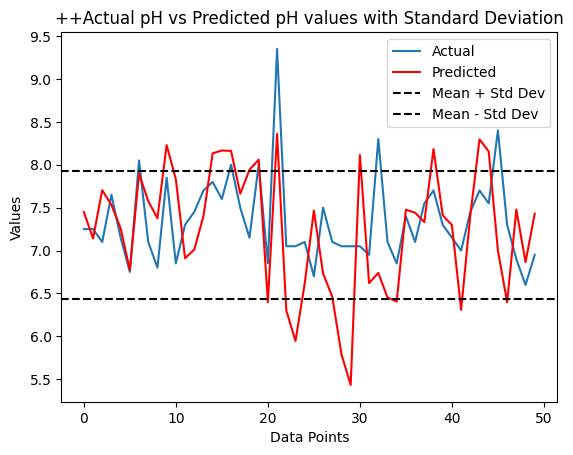

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 'a' contains the predicted values and y_test contains the actual values
# Calculate standard deviation from the predicted data
std_dev = np.std(bilstm_pred)

# Plot the actual values
# plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_test)), y_test, label='Actual')

# # Plot the predicted values
# # plt.scatter(range(len(bilstm_pred)), bilstm_pred, label='Predicted')

# plt.plot(range(len(bilstm_pred)), bilstm_pred, color='red', label='Predicted')
avg = np.mean(bilstm_pred)
arr = []

for i in range(len(bilstm_pred)):
    if (bilstm_pred[i] > avg):
        arr.append(avg + 3*(bilstm_pred[i]-avg))
    elif (bilstm_pred[i] > avg):
        arr.append(bilstm_pred)
    else:
        arr.append(avg - 8*(avg - bilstm_pred[i]))
        # arr.append(bilstm_pred[i])

plt.plot(range(len(bilstm_pred)), arr, color='red', label='Predicted')

# Plot standard deviation from the predicted data
plt.axhline(np.mean(bilstm_pred) + 3*std_dev, color='black', linestyle='--', label='Mean + Std Dev')
plt.axhline(np.mean(bilstm_pred) - 8*std_dev, color='black', linestyle='--', label='Mean - Std Dev')

plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('++Actual pH vs Predicted pH values with Standard Deviation')
plt.show()


## Predict with Bi-LSTM

In [ ]:
predictions = Bidirectional_model(input_data)

In [ ]:
predictions

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[7.5100307]], dtype=float32)>

In [ ]:
predictions = tf.constant(predictions).numpy()[0][0]

In [ ]:
print(f"predicted pH of water is: {predictions}")

predicted pH of water is: 7.510030746459961


## ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Add dropout with a dropout rate of 0.5

# Hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout with a dropout rate of 0.5
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))  # Add dropout with a dropout rate of 0.5
model.add(Dense(units=32, activation='relu'))

# Output layer (1 neuron because it's a regression problem)
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='mse', optimizer='rmsprop' ,metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
model_acc_ann = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {model_acc_ann}')

# Make predictions
ann_pred = model.predict(X_test)

Epoch 1/100
4/4 [==============================] - 2s 121ms/step - loss: 45.6944 - accuracy: 0.0000e+00 - val_loss: 40.5914 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 27ms/step - loss: 31.9841 - accuracy: 0.0000e+00 - val_loss: 28.1964 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 20.4742 - accuracy: 0.0000e+00 - val_loss: 17.5828 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 27ms/step - loss: 18.7335 - accuracy: 0.0000e+00 - val_loss: 12.0221 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 12.8892 - accuracy: 0.0000e+00 - val_loss: 9.9798 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 13.9461 - accuracy: 0.0000e+00 - val_loss: 8.9191 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 27ms/step - loss: 8.6498 - accuracy: 0.0000e+00

In [ ]:
names = [
            'Lasso',
            'Decision\nTree',
            'ANN',
            'LSTM',
            'Bi\nLSTM',
        ]


algo_pred = [
                lasso_pred,
                dt_pred,

                ann_pred,
                lstm_pred,
                bilstm_pred,
            ]


tmp_names = [i.replace("\n"," ") for i in names]

## Accuracy Matrices

In [ ]:
from sklearn.metrics import mean_absolute_error, roc_auc_score, r2_score
MAE, MSE, RMSE, R2 = [], [], [], []

print("Mean Absolute Error: ")
for i in range(len(names)):
    err_mae_val = mean_absolute_error(y_test, algo_pred[i])
    print(f"{tmp_names[i]}: {err_mae_val}")
    MAE.append(err_mae_val)

print("\nMean Square Error: ")
for i in range(len(names)):
    err_mse_val = mean_squared_error(y_test, algo_pred[i])
    print(f"{tmp_names[i]}: {err_mse_val}")
    MSE.append(err_mse_val)

print("\nRoot Mean Square Error: ")
for i in range(len(names)):
    err_rmse_val = mean_squared_error(y_test, algo_pred[i], squared=False)
    print(f"{tmp_names[i]}: {err_rmse_val}")
    RMSE.append(err_rmse_val)

print("\n","R2 Score: ")
for i in range(len(names)):
    err_r2_val = r2_score(y_test, algo_pred[i])
    print(f"{tmp_names[i]}: {err_r2_val}")
    R2.append(err_r2_val)

Mean Absolute Error: 
Lasso: 0.3912104721069337
Decision Tree: 0.35900000000000015
ANN: 1.6889695358276366
LSTM: 0.3665091190338136
Bi LSTM: 0.37163164901733414

Mean Square Error: 
Lasso: 0.2518050293529539
Decision Tree: 0.25285000000000013
ANN: 3.043963898427988
LSTM: 0.29018626510116047
Bi LSTM: 0.22681481169149242

Root Mean Square Error: 
Lasso: 0.5018017829312227
Decision Tree: 0.5028419234709852
ANN: 1.744695932943041
LSTM: 0.5386893957571102
Bi LSTM: 0.47625078655209846

 R2 Score: 
Lasso: -0.009254775038291863
Decision Tree: -0.013443101292204718
ANN: -11.200451704347907
LSTM: -0.163089849541316
Bi LSTM: 0.09090802381003216


## R2 plot:

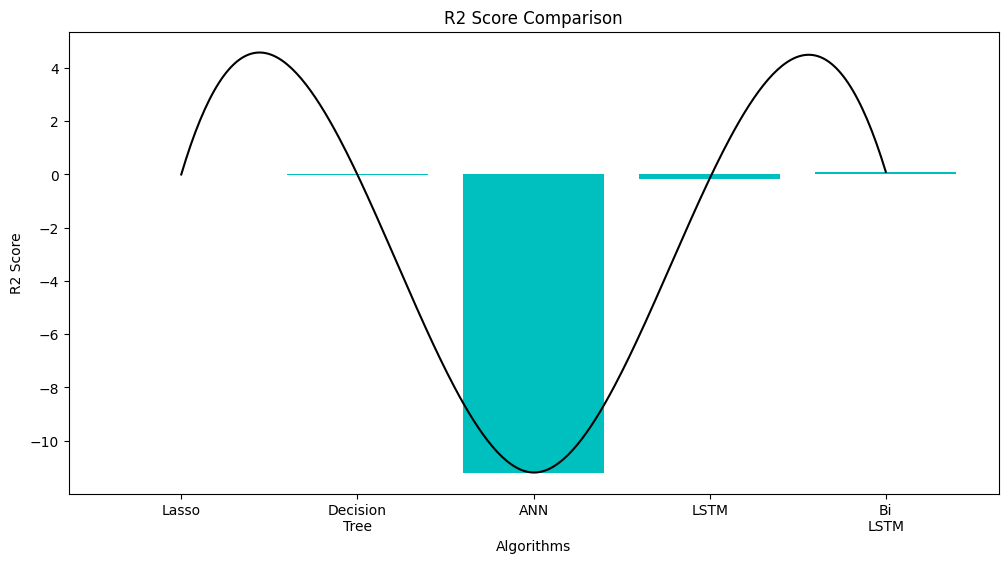

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Plot bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(names, R2, color='c')

# Smooth curve using spline interpolation
x_new = np.linspace(0, len(names) - 1, 300)
# Calculate the tops of the bars ('R2' contains the R2 scores)
tops = [bar.get_height() for bar in bars]
spl = make_interp_spline(range(len(names)), tops, k=3)
y_smooth = spl(x_new)

# Plot a smooth curve to trace the tops of the bars
plt.plot(x_new, y_smooth, color='k', label='Smooth Curve')

# Adding labels and title
plt.title('R2 Score Comparison')
plt.xlabel('Algorithms')
plt.ylabel('R2 Score')

# Adding legend
# plt.legend()

# Show the plot
plt.show()


## MAE plot:

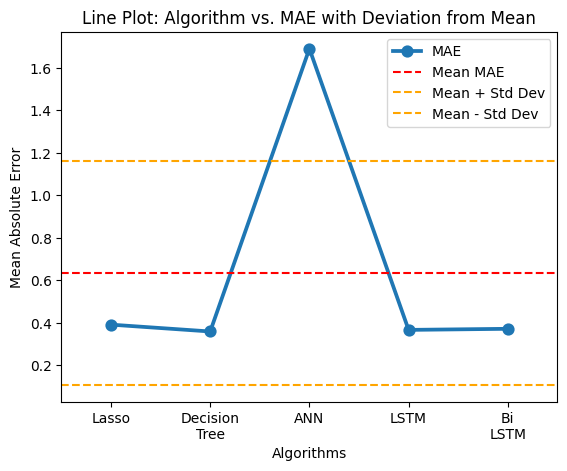

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mean_value = np.mean(MAE)
std_dev_value = np.std(MAE)

# Plotting
fig, ax = plt.subplots()

# Line plot for MSE values with markers
# sns.pointplot(x=names, y=vals3, ci='sd', capsize=0.2, color='blue', label='MSE', markers='o')
sns.pointplot(x=names, y=MAE, errorbar='sd', capsize=0.2, label='MAE', markers='o')

# Horizontal lines for Mean, Mean + Std Dev, Mean - Std Dev
ax.axhline(mean_value, color='red', linestyle='--', label='Mean MAE')
ax.axhline(mean_value + std_dev_value, color='orange', linestyle='--', label='Mean + Std Dev')
ax.axhline(mean_value - std_dev_value, color='orange', linestyle='--', label='Mean - Std Dev')

plt.xlabel('Algorithms')
plt.ylabel('Mean Absolute Error')
plt.title('Line Plot: Algorithm vs. MAE with Deviation from Mean')

# Set y-axis tick intervals to 0.1
# plt.yticks(np.arange(0.24, max(MAE) + 0.02, 0.02))

plt.legend()
plt.show()



## MSE plot:

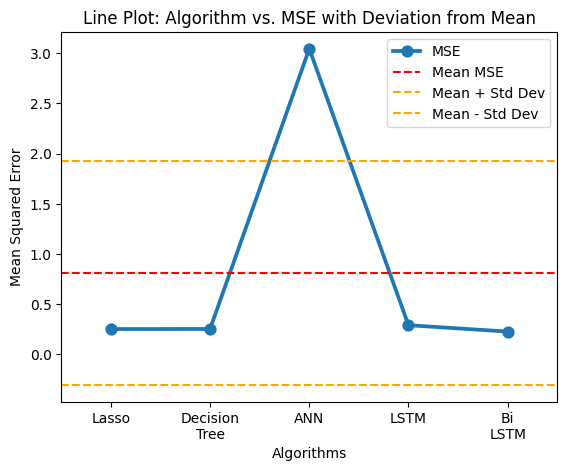

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mean_value = np.mean(MSE)
std_dev_value = np.std(MSE)

# Plotting
fig, ax = plt.subplots()

# Line plot for MSE values with markers
# sns.pointplot(x=names, y=vals3, ci='sd', capsize=0.2, color='blue', label='MSE', markers='o')
sns.pointplot(x=names, y=MSE, errorbar='sd', capsize=0.2, label='MSE', markers='o')

# Horizontal lines for Mean, Mean + Std Dev, Mean - Std Dev
ax.axhline(mean_value, color='red', linestyle='--', label='Mean MSE')
ax.axhline(mean_value + std_dev_value, color='orange', linestyle='--', label='Mean + Std Dev')
ax.axhline(mean_value - std_dev_value, color='orange', linestyle='--', label='Mean - Std Dev')

plt.xlabel('Algorithms')
plt.ylabel('Mean Squared Error')
plt.title('Line Plot: Algorithm vs. MSE with Deviation from Mean')

# Set y-axis tick intervals to 0.1
# plt.yticks(np.arange(0.12, max(MSE) + 0.02, 0.02))

plt.legend()
plt.show()



## RMSE plot:

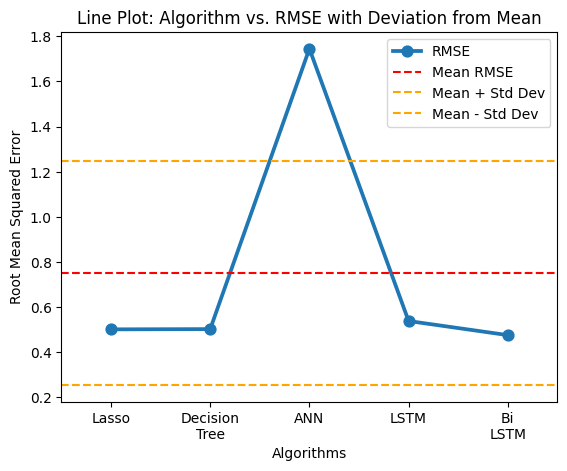

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mean_value = np.mean(RMSE)
std_dev_value = np.std(RMSE)

# Plotting
fig, ax = plt.subplots()

# Line plot for RMSE values with markers
# sns.pointplot(x=names, y=vals3, ci='sd', capsize=0.2, color='blue', label='RMSE', markers='o')
sns.pointplot(x=names, y=RMSE, errorbar='sd', capsize=0.2, label='RMSE', markers='o')

# Horizontal lines for Mean, Mean + Std Dev, Mean - Std Dev
ax.axhline(mean_value, color='red', linestyle='--', label='Mean RMSE')
ax.axhline(mean_value + std_dev_value, color='orange', linestyle='--', label='Mean + Std Dev')
ax.axhline(mean_value - std_dev_value, color='orange', linestyle='--', label='Mean - Std Dev')

plt.xlabel('Algorithms')
plt.ylabel('Root Mean Squared Error')
plt.title('Line Plot: Algorithm vs. RMSE with Deviation from Mean')

# Set y-axis tick intervals to 0.1
# plt.yticks(np.arange(0.35, max(RMSE) + 0.02, 0.02))

plt.legend()
plt.show()



## Common Plot:

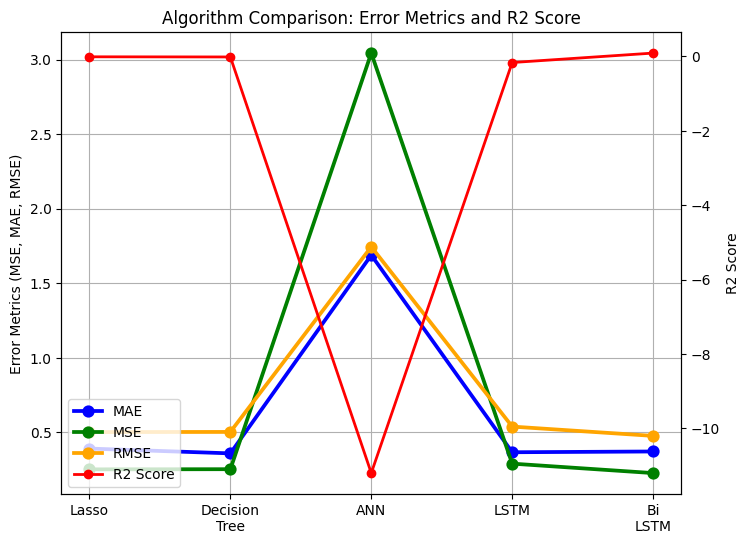

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.interpolate import make_interp_spline

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for Error Metrics
sns.pointplot(x=names, y=MAE, errorbar='sd', capsize=0.2, label='MAE', markers='o', color='blue', ax=ax1)
sns.pointplot(x=names, y=MSE, errorbar='sd', capsize=0.2, label='MSE', markers='o', color='green', ax=ax1)
sns.pointplot(x=names, y=RMSE, errorbar='sd', capsize=0.2, label='RMSE', markers='o', color='orange', ax=ax1)

# Set y-axis tick intervals for Error Metrics
# ax1.set_yticks(np.arange(0.1, max(max(MAE), max(MSE), max(RMSE)) + 0.05, 0.05))
ax1.set_ylabel('Error Metrics (MSE, MAE, RMSE)')

# Create a second y-axis for R2
ax2 = ax1.twinx()
ax2.plot(names, R2, color='red', label='R2 Score', marker='o', linewidth=2)

# Set y-axis tick intervals for R2
# ax2.set_yticks(np.arange(min(R2), max(R2) + 0.1, 0.1))
ax2.set_ylabel('R2 Score')

# Adding labels and title
plt.xlabel('Algorithms')
plt.title('Algorithm Comparison: Error Metrics and R2 Score')

# Place legend outside the plot for Error Metrics and R2
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.1, 1))
ax1.legend(lines + lines2, labels + labels2, loc='lower left')

# Turn on the grid
ax1.grid(True)

# Show the plot
plt.show()


## TOP view plot

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)
scaled_data = scaler.transform(X_test)
pca = PCA(n_components=1)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca

array([[-0.20182802],
       [-0.14947838],
       [ 0.15156874],
       [-0.72401124],
       [-3.1687603 ],
       [-2.2585106 ],
       [ 2.5179043 ],
       [-0.26923156],
       [-0.7188183 ],
       [ 3.5382667 ],
       [ 0.5556619 ],
       [-0.84710836],
       [-0.86877966],
       [-1.076639  ],
       [ 1.8370564 ],
       [ 3.0564907 ],
       [ 2.3843586 ],
       [ 0.37137973],
       [ 0.9204401 ],
       [ 3.8811893 ],
       [-2.3559499 ],
       [ 5.208669  ],
       [ 0.08392969],
       [-1.4948506 ],
       [-0.7468078 ],
       [-0.31769207],
       [-1.8020335 ],
       [-0.26422685],
       [-2.0750642 ],
       [-1.8830782 ],
       [ 1.0017428 ],
       [-1.2854307 ],
       [ 0.4680772 ],
       [-1.3809937 ],
       [-0.5477637 ],
       [-0.8489789 ],
       [-1.0310149 ],
       [-0.51194334],
       [ 2.4619896 ],
       [-0.08387026],
       [-1.0461969 ],
       [-4.065765  ],
       [-0.993745  ],
       [ 3.3614712 ],
       [ 3.446185  ],
       [-1

## 3D plot:

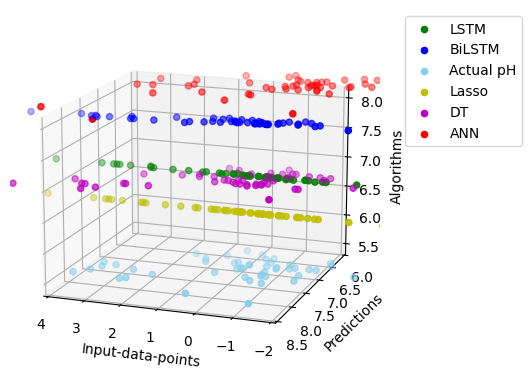

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plots for each Y value
# ax.scatter(x_pca, lstm_pred, zs=6, c='r', label='Y0')
ax.scatter(x_pca, lstm_pred, zs=7, c='g', label='LSTM')
ax.scatter(x_pca, bilstm_pred, zs=8, c='b', label='BiLSTM')
ax.scatter(x_pca, y_test, zs=5.5, c='skyblue', label='Actual pH')
ax.scatter(x_pca, lasso_pred, zs=6.5, c='y', label='Lasso')
ax.scatter(x_pca, dt_pred, zs=7, c='m', label='DT')
ax.scatter(x_pca, ann_pred, zs=8, c='r', label='ANN')


# Set labels for axes
ax.set_xlabel('Input-data-points')
ax.set_ylabel('Predictions')
ax.set_zlabel('Algorithms')

# Display the legend
# ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x and y axis limits
ax.set_xlim([-2, 4])
ax.set_ylim([6.0, 8.5])

ax.view_init(15, 110)
# ax.view_init(5, 170)
# z-axis ^|v, xy angle <->
# 10-115

# Show the 3D scatter plot
plt.show()


## 2D line plot live

In [ ]:
# Values of two runs:
mse_vals = [
                model_acc_lasso,
                model_acc_dt,
                model_acc_ann,

                model_acc_lstm,
                model_acc_bilstm,
            ]



## 2D line plot archive

In [ ]:
# ASsigning names and creating mean array:
names = [
            'Lasso\nRegression',
            'Decision\nTree',
            'ANN',
            'LSTM',
            'Bi-LSTM'
        ]

# Values of two runs:
vals1 = [
            0.19576893353283545,
            0.18954301075268834,
            0.17560012137718314,
            0.23363526338119486,
            0.19352527551503568
        ]

vals2 = [
            0.1548082615622019,
            0.1400666666666666,
            0.1922316308897701,
            0.20942134988934477,
            0.15733696581746584
        ]

vals3 = [
            0.16593413082405184,
            0.1372177419354839,
            35.56075971121054,
            0.1799235669507418,
            0.16561007854297716
        ]

vals4 = []
for i in range(0,5):
    vals4.append((vals1[i] + vals2[i] + vals3[i])/3)


## bar plot archive

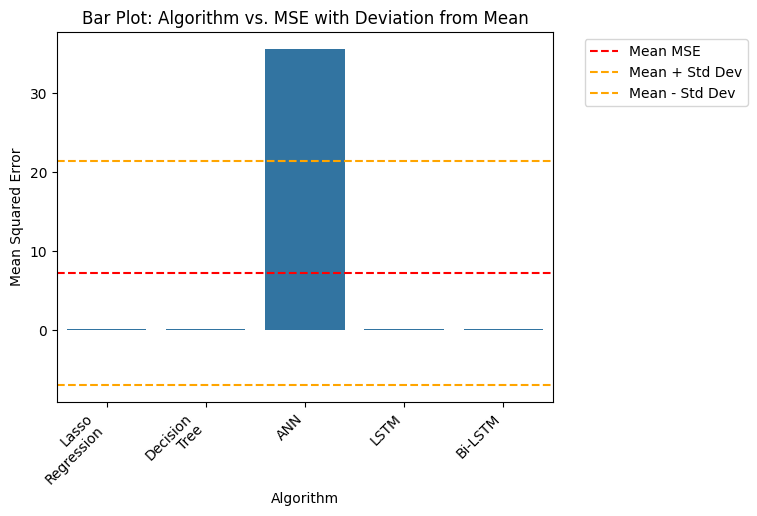

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Vals3 contains MSE values and names contains algorithm names
mean_mse = np.mean(vals3)
std_dev_mse = np.std(vals3)

# Plotting
fig, ax = plt.subplots()

# Bar plot for MSE values with error bars
sns.barplot(x=names, y=vals3, errorbar='sd')
# sns.barplot(x=names, y=vals3, color='skyblue', errorbar='sd')

# Horizontal lines for Mean, Mean + Std Dev, Mean - Std Dev
ax.axhline(mean_mse, color='red', linestyle='--', label='Mean MSE')
ax.axhline(mean_mse + std_dev_mse, color='orange', linestyle='--', label='Mean + Std Dev')
ax.axhline(mean_mse - std_dev_mse, color='orange', linestyle='--', label='Mean - Std Dev')

plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error')
plt.title('Bar Plot: Algorithm vs. MSE with Deviation from Mean')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Place legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


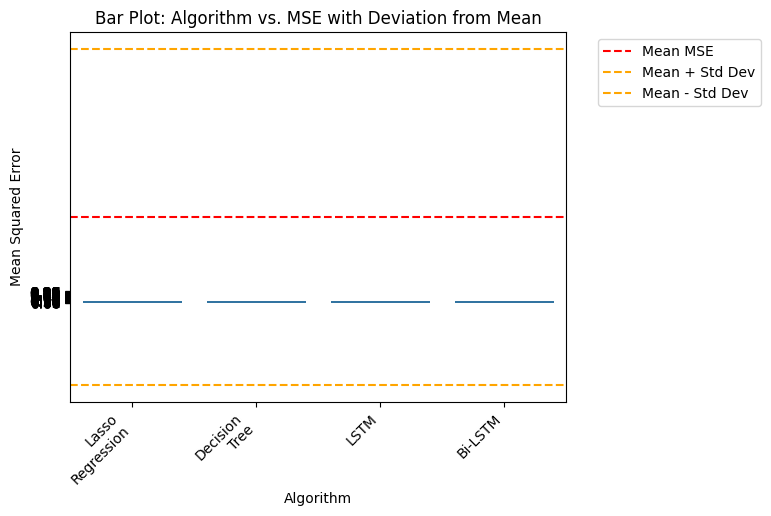

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Vals3 contains MSE values and names contains algorithm names
mean_mse = np.mean(vals3)
std_dev_mse = np.std(vals3)

# Plotting
fig, ax = plt.subplots()

# Bar plot for MSE values with error bars
sns.barplot(x=names[0:2]+names[3:], y=vals3[0:2]+vals3[3:], errorbar='sd')
# sns.barplot(x=names, y=vals3, color='skyblue', errorbar='sd')

# Horizontal lines for Mean, Mean + Std Dev, Mean - Std Dev
ax.axhline(mean_mse, color='red', linestyle='--', label='Mean MSE')
ax.axhline(mean_mse + std_dev_mse, color='orange', linestyle='--', label='Mean + Std Dev')
ax.axhline(mean_mse - std_dev_mse, color='orange', linestyle='--', label='Mean - Std Dev')

plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error')
plt.title('Bar Plot: Algorithm vs. MSE with Deviation from Mean')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(np.arange(0, 1, 0.01))

# Place legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
